# Support Vector Regression (SVR)

## Importing the libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [108]:
datset = pd.read_csv('Position_Salaries.csv')
X=datset.iloc[:, 1:-1].values
y=datset.iloc[:, -1].values

In [109]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [110]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [111]:
#transform y to a 2D array
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [112]:
# apply feature scaling should be applied to both the features and target (Dependant variable)
#as the target is not binary but has a big range and the feature has a short range
# this will cause the feature to be neglected

#you cannot use the same standard scaler for the dependant variable as the range is different. you need to use another one

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [113]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [114]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole dataset

In [115]:
#use the rbf kernel for the svr model ( the most widely used model)
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


/Users/sandeepkompella/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predicting a new result

In [116]:
#you need to reverse the scaling while predicting the salary to get the original scale
#use the inverse transform method
scaled_sal = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
print(scaled_sal)

[170370.0204065]


## Visualising the SVR results

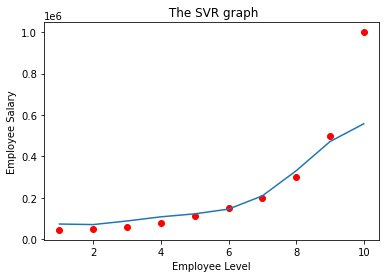

In [117]:
plt.title(" The SVR graph")
plt.xlabel("Employee Level")
plt.ylabel("Employee Salary")
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)))
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

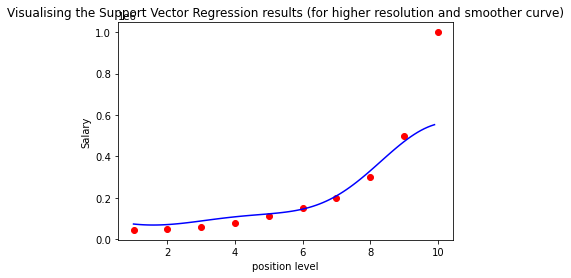

In [118]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))),color='blue')
plt.title('Visualising the Support Vector Regression results (for higher resolution and smoother curve)')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()